In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium as fo
import plotly as ply
import plotly.graph_objects as go
import matplotlib

from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib

In [2]:
GEN_HL3 = [ 
        '#2d97e1', 
    '#82caff',   
    '#7a4e28',
    '#eead63'

]

GEN_HL3 = ListedColormap(GEN_HL3)

In [3]:
like2030nl=pd.read_excel("trn_service_20240821_allVin_lovehate.xlsx", sheet_name ="crt2030_nl_love").iloc[:,:16]
like2030l=pd.read_excel("trn_service_20240821_allVin_lovehate.xlsx", sheet_name ="crt2030_l_love").iloc[:,:16]
like2040nl=pd.read_excel("trn_service_20240821_allVin_lovehate.xlsx", sheet_name ="crt2040_nl_love").iloc[:,:16]
like2040l=pd.read_excel("trn_service_20240821_allVin_lovehate.xlsx", sheet_name ="crt2040_l_love").iloc[:,:16]

hate2030nl=pd.read_excel("trn_service_20240821_allVin_lovehate.xlsx", sheet_name ="crt2030_nl_hate").iloc[:,:16]
hate2030l=pd.read_excel("trn_service_20240821_allVin_lovehate.xlsx", sheet_name ="crt2030_l_hate").iloc[:,:16]
hate2040nl=pd.read_excel("trn_service_20240821_allVin_lovehate.xlsx", sheet_name ="crt2040_nl_hate").iloc[:,:16]
hate2040l=pd.read_excel("trn_service_20240821_allVin_lovehate.xlsx", sheet_name ="crt2040_l_hate").iloc[:,:16]

In [4]:
desired_order_input = ['Liquids', 'Hybrid Liquids', 'BEV', "FCEV"]
desired_order_sce_2030 = ['Carrot w/ Quick Stick (love BEV)', 'Carrot w/ Quick Stick (hate BEV)', 
                     'Carrot w/ Quick Stick (Accelerated Innovation, love BEV)', 
                     'Carrot w/ Quick Stick (Accelerated Innovation, hate BEV)']

desired_order_sce_2040 = ['Carrot w/ Slow Stick (love BEV)', 'Carrot w/ Slow Stick (hate BEV)', 
                     'Carrot w/ Slow Stick (Accelerated Innovation, love BEV)', 
                     'Carrot w/ Slow Stick (Accelerated Innovation, hate BEV)']


In [5]:
def cal_trn(df):
    df2 = df[df['subsector'] =="Car"]
    new_df = df2.groupby('input').sum().reset_index()
    columns_to_select = ['input', 'i2015', 'i2020', 'i2025', 'i2030', 'i2035', 'i2040', 'i2045', 'i2050']

    selected_df = new_df[columns_to_select]
    selected_df2 = selected_df.transpose()

    selected_df2.columns = selected_df2.iloc[0]  
    selected_df2 = selected_df2.drop(selected_df2.index[0]) 

    return(selected_df2)

In [6]:
like_2030nl = cal_trn(like2030nl)
like_2030l = cal_trn(like2030l)
like_2040nl = cal_trn(like2040nl)
like_2040l = cal_trn(like2040l)

hate_2030nl = cal_trn(hate2030nl)
hate_2030l = cal_trn(hate2030l)
hate_2040nl = cal_trn(hate2040nl)
hate_2040l = cal_trn(hate2040l)

In [7]:
years = ['2015', '2020', '2025', '2030', '2035','2040', '2045', '2050']
like_2030nl.index = years
like_2030l.index = years
like_2040nl.index = years
like_2040l.index = years

hate_2030nl.index = years
hate_2030l.index = years
hate_2040nl.index = years
hate_2040l.index = years

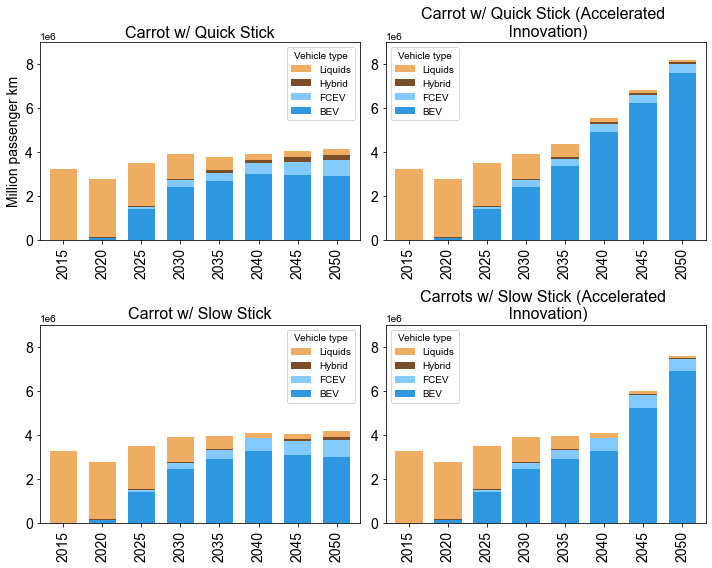

In [8]:
mpl.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'width_ratios': [1,  1], 'height_ratios': [1, 1]})


like_2030nl.plot(kind='bar', stacked=True, ax=axs[0,0], cmap=GEN_HL3, width=0.7)
like_2030l.plot(kind='bar', stacked=True, ax=axs[0,1], cmap=GEN_HL3, width=0.7)
like_2040nl.plot(kind='bar', stacked=True, ax=axs[1,0], cmap=GEN_HL3, width=0.7)
like_2040l.plot(kind='bar', stacked=True, ax=axs[1,1], cmap=GEN_HL3, width=0.7)

axs[0, 0].set_title('Carrot w/ Quick Stick', fontsize=16)
axs[0, 0].set_ylabel('Million passenger km', fontsize=14)

axs[0, 1].set_title('Carrot w/ Quick Stick (Accelerated \n Innovation)', fontsize=16)
axs[1, 0].set_title('Carrot w/ Slow Stick', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick (Accelerated \n Innovation)', fontsize=16)
replacements = {
    "Hybrid Liquids": "Hybrid"
}

for ax in axs.flat:
    legend = ax.legend()
    handles, labels = plt.gca().get_legend_handles_labels()
    if legend is not None:
        legend.set_title("technology")
    # Replace patterns in each label
    for i, label in enumerate(labels):
        for old, new in replacements.items():
            labels[i] = labels[i].replace(old, new)
    ax.set_ylim(0, 9000000)
    ax.tick_params(axis='both', which='major', labelsize=14)
    # Set the legend with the updated, reversed order
    ax.legend(handles[::-1], labels[::-1], title ="Vehicle type")

plt.tight_layout()
plt.show()


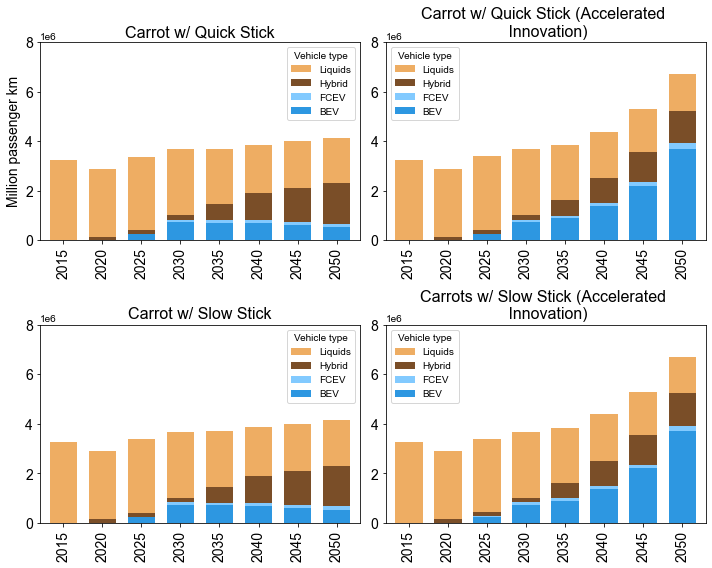

In [9]:
mpl.rcParams['font.family'] = 'Arial'

fig, axs = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'width_ratios': [1,  1], 'height_ratios': [1, 1]})

hate_2030nl.plot(kind='bar', stacked=True, ax=axs[0,0], cmap=GEN_HL3, width=0.7)
hate_2030l.plot(kind='bar', stacked=True, ax=axs[0,1], cmap=GEN_HL3, width=0.7)
hate_2030nl.plot(kind='bar', stacked=True, ax=axs[1,0], cmap=GEN_HL3, width=0.7)
hate_2030l.plot(kind='bar', stacked=True, ax=axs[1,1], cmap=GEN_HL3, width=0.7)


axs[0, 0].set_title('Carrot w/ Quick Stick', fontsize=16)
axs[0, 0].set_ylabel('Million passenger km', fontsize=14)

axs[0, 1].set_title('Carrot w/ Quick Stick (Accelerated \n Innovation)', fontsize=16)
axs[1, 0].set_title('Carrot w/ Slow Stick', fontsize=16)
axs[1, 1].set_title('Carrots w/ Slow Stick (Accelerated \n Innovation)', fontsize=16)


for ax in axs.flat:
    legend = ax.legend()
    handles, labels = plt.gca().get_legend_handles_labels()
    if legend is not None:
        legend.set_title("technology")
    for i, label in enumerate(labels):
        for old, new in replacements.items():
            labels[i] = labels[i].replace(old, new)
    ax.set_ylim(0, 8000000)
    ax.tick_params(axis='both', which='major', labelsize=14)
    # Set the legend with the updated, reversed order
    ax.legend(handles[::-1], labels[::-1], title ="Vehicle type")



plt.tight_layout()

plt.show()
